# Affine function plot

In this notebook, I will show you my full process while trying to plot an affine function based on `data.csv`.

First of all, I will need 2 libs:
 - `pandas`
 - `matplotlib.pyplot`

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Then I will plot all value from `data.csv`.

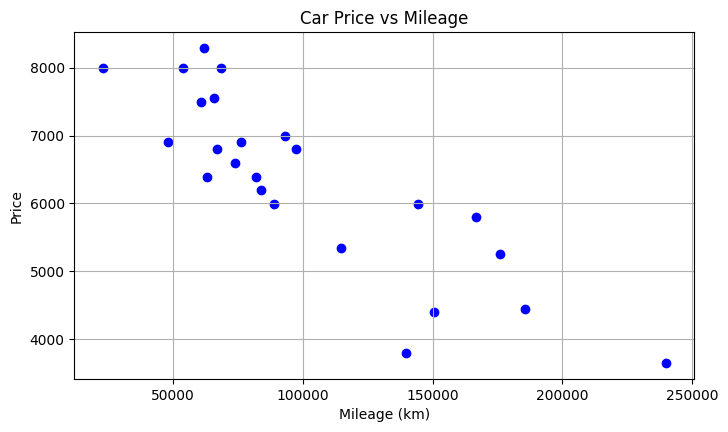

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def main():
    df = pd.read_csv("../data/data.csv")

    plt.figure(figsize=(8, 4.5))
    plt.scatter(df['km'], df['price'], color='blue', marker='o')
    plt.grid(True)

    plt.title("Car Price vs Mileage")
    plt.xlabel("Mileage (km)")
    plt.ylabel("Price")

    plt.show()


if __name__ == "__main__":
    main()

For a better view and understanding, I prefer use line instead of point. 
Sorted values are needed for a logic plot.

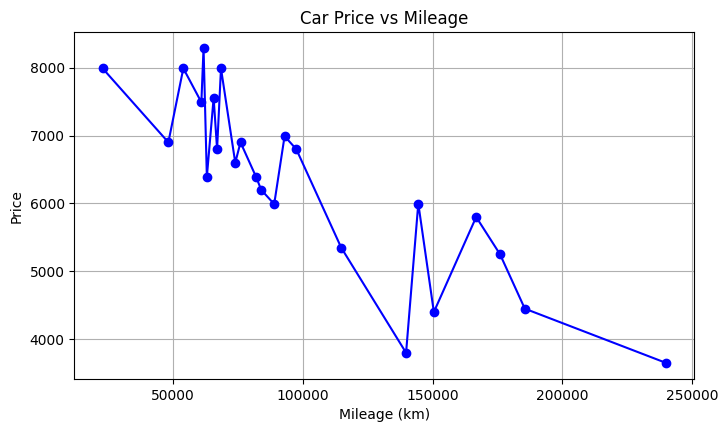

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def main():
    df = pd.read_csv("../data/data.csv")
    df = df.sort_values('km')

    plt.figure(figsize=(8, 4.5))
    plt.plot(df['km'], df['price'], color='blue', linestyle='-', marker='o')
    plt.grid(True)

    plt.title("Car Price vs Mileage")
    plt.xlabel("Mileage (km)")
    plt.ylabel("Price")

    plt.show()


if __name__ == "__main__":
    main()

Let's try to plot the affine function now.

Affine functions look like this:

$$f(x) = ax + b$$

So for each segment of the graph, I need to find $a$ and $b$.

Given two points $ (x_1, y_1) $ and $ (x_2, y_2) $, we compute the affine function parameters:

$$
a = \frac{y_2 - y_1}{x_2 - x_1}
$$

$$
b = y_1 - a \cdot x_1
$$

In [61]:
import pandas as pd
import matplotlib.pyplot as plt


def calc_affine(x1: float, y1: float, x2: float, y2: float) -> tuple[float, float]:
    a = (y2 - y1) / (x2 - x1)
    b = y1 - (a * x1)

    return (a, b)


def iterate_df(df: pd.DataFrame) -> None:
    for (x1, y1), (x2, y2) in zip(df.iloc[:-1][['km', 'price']].values, df.iloc[1:][['km', 'price']].values):
        a, b = calc_affine(x1, y1, x2, y2)
        print(f"x1: {x1: 7} x2: {x2: 7} y1: {y1: 5} y2: {y2: 5} | a: {a: .5f} - b: {b: 13.5f}")


def main():
    df = pd.read_csv("../data/data.csv")
    df = df.sort_values('km')

    iterate_df(df)

if __name__ == "__main__":
    main()

x1:   22899 x2:   48235 y1:  7990 y2:  6900 | a: -0.04302 - b:    8975.15590
x1:   48235 x2:   54000 y1:  6900 y2:  7990 | a:  0.18907 - b:   -2219.88725
x1:   54000 x2:   60949 y1:  7990 y2:  7490 | a: -0.07195 - b:   11875.45114
x1:   60949 x2:   61789 y1:  7490 y2:  8290 | a:  0.95238 - b:  -50556.66667
x1:   61789 x2:   63060 y1:  8290 y2:  6390 | a: -1.49489 - b:  100657.50590
x1:   63060 x2:   65674 y1:  6390 y2:  7555 | a:  0.44568 - b:  -21714.39939
x1:   65674 x2:   67000 y1:  7555 y2:  6800 | a: -0.56938 - b:   44948.56712
x1:   67000 x2:   68500 y1:  6800 y2:  7990 | a:  0.79333 - b:  -46353.33333
x1:   68500 x2:   74000 y1:  7990 y2:  6600 | a: -0.25273 - b:   25301.81818
x1:   74000 x2:   76025 y1:  6600 y2:  6900 | a:  0.14815 - b:   -4362.96296
x1:   76025 x2:   82029 y1:  6900 y2:  6390 | a: -0.08494 - b:   13357.81979
x1:   82029 x2:   84000 y1:  6390 y2:  6200 | a: -0.09640 - b:   14297.41248
x1:   84000 x2:   89000 y1:  6200 y2:  5990 | a: -0.04200 - b:    9728.00000

Now, let's take back plot and try to print the affine function with average $a$ and $b$.

a:  0.00279 | b:    6233.69744


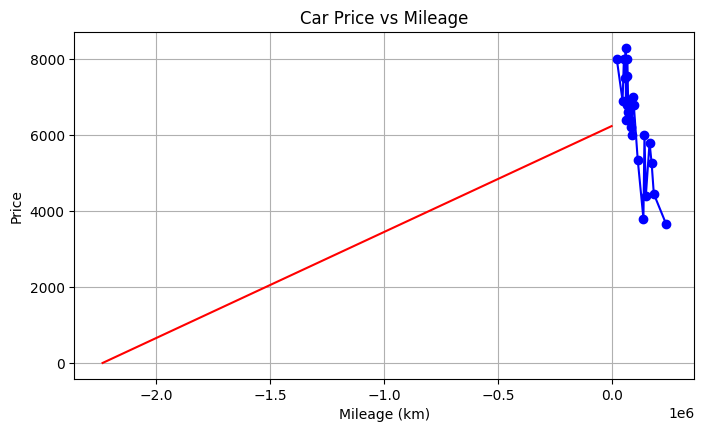

In [80]:
import pandas as pd
import matplotlib.pyplot as plt


def calc_affine(x1: float, y1: float, x2: float, y2: float) -> tuple[float, float]:
    a = (y2 - y1) / (x2 - x1)
    b = y1 - (a * x1)

    return (a, b)


def mean_affine(df: pd.DataFrame) -> tuple[float, float]:
    total_a, total_b = 0, 0

    for (x1, y1), (x2, y2) in zip(df.iloc[:-1][['km', 'price']].values, df.iloc[1:][['km', 'price']].values):
        a, b = calc_affine(x1, y1, x2, y2)
        total_a += a
        total_b += b

    a = total_a / (len(df) - 1)
    b = total_b / (len(df) - 1)

    return (a, b)


def main():
    df = pd.read_csv("../data/data.csv")
    df = df.sort_values('km')

    a, b = mean_affine(df)
    print(f"a: {a: .5f} | b: {b: 13.5f}")

    x_val = [0, -b / a]
    y_val = [b, 0]

    plt.figure(figsize=(8, 4.5))
    plt.plot(df['km'], df['price'], color='blue', linestyle='-', marker='o')
    plt.plot(x_val, y_val, color='red', linestyle='-')
    plt.grid(True)

    plt.title("Car Price vs Mileage")
    plt.xlabel("Mileage (km)")
    plt.ylabel("Price")

    plt.show()

if __name__ == "__main__":
    main()

I have average $a$ and $b$ but something is wrong with my logic
The problem is every segment has the same value on my average.
The 2 first segment show well the problem:
```
x1:   22899 x2:   48235 y1:  7990 y2:  6900 | a: -0.04302 - b:    8975.15590
x1:   48235 x2:   54000 y1:  6900 y2:  7990 | a:  0.18907 - b:   -2219.88725
```

For the first segment:
$
x_2 - x_1 = 48,235 - 22,899 = 25,336
$

And the second one:
$
x_2 - x_1 = 54,000 - 48,235 = 5,765
$

The second segment has smaller $x$ length but it has the same value in my average.

To fix that, I can multiply my $a$ and $b$ by the $x$ length and divide the $total$ by the difference between $x_{\text{max}}$ and $x_{\text{min}}$.

a: -0.01999 | b:    7937.73732


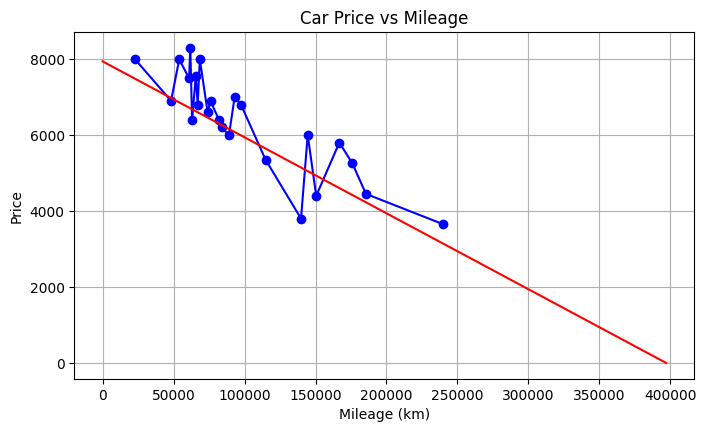

In [81]:
import pandas as pd
import matplotlib.pyplot as plt


def calc_affine(x1: float, y1: float, x2: float, y2: float) -> tuple[float, float]:
    a = (y2 - y1) / (x2 - x1)
    b = y1 - (a * x1)

    return (a, b)


def mean_affine(df: pd.DataFrame) -> tuple[float, float]:
    total_a, total_b = 0, 0

    for (x1, y1), (x2, y2) in zip(df.iloc[:-1][['km', 'price']].values, df.iloc[1:][['km', 'price']].values):
        a, b = calc_affine(x1, y1, x2, y2)
        p = x2 - x1
        total_a += a * p
        total_b += b * p

    p = df['km'].max() - df['km'].min()
    a = total_a / p
    b = total_b / p

    return (a, b)


def main():
    df = pd.read_csv("../data/data.csv")
    df = df.sort_values('km')

    a, b = mean_affine(df)
    print(f"a: {a: .5f} | b: {b: 13.5f}")

    x_val = [0, -b / a]
    y_val = [b, 0]

    plt.figure(figsize=(8, 4.5))
    plt.plot(df['km'], df['price'], color='blue', linestyle='-', marker='o')
    plt.plot(x_val, y_val, color='red', linestyle='-')
    plt.grid(True)

    plt.title("Car Price vs Mileage")
    plt.xlabel("Mileage (km)")
    plt.ylabel("Price")

    plt.show()

    plt.show()

if __name__ == "__main__":
    main()